Introduction

This project aims to analyze and predict health insurance charges in the US using a publicly available dataset. The analysis explores what factors drive insurance costs, focusing on variables such as age, BMI, number of children, smoker status, sex, and region. By leveraging exploratory data analysis, data preprocessing, and machine learning techniques (particularly Random Forest Regression), the project provides actionable insights for identifying key cost drivers and potential interventions.

The workflow includes:

Project setup and environment configuration

Data loading and initial exploration

In-depth exploratory data analysis

Data preprocessing and feature engineering

Building and evaluating a predictive model

Model interpretation to assess feature importance

The findings can help both analysts and decision-makers understand insurance costs and optimize mitigation strategies.

## 1. Project Setup, Data Loading, and Initial Exploration

This section sets up the Python environment, loads the data, and performs initial checks for structure, data types, and missing values.

The target variable is charges, which we aim to predict.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib # For saving the final model

# Set plotting style for better visualization
sns.set_style("whitegrid")

# --- Data Loading ---
df = pd.read_csv("insurance.csv")

print("### Data Loading and Structure Check\n")

# Display the first few rows
print("--- DataFrame Head ---")
print(df.head())
print("-" * 20 + "\n")

# Get a concise summary of the DataFrame
print("--- DataFrame Info ---")
print(df.info())
print("-" * 20 + "\n")

# Check for missing values explicitly
print("--- Missing Values Count ---")
print(df.isnull().sum())
print("-" * 20 + "\n")

# --- Initial Findings ---
# 1. The dataset contains 1338 entries and 7 columns.
# 2. No missing values were found (all columns have 1338 non-null counts), eliminating the need for imputation.
# 3. Data types are appropriate: 
#    - Numerical: 'age', 'bmi', 'children', 'charges'.
#    - Categorical: 'sex', 'smoker', 'region'.

### Data Loading and Structure Check

--- DataFrame Head ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
--------------------

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage:

## 2. Exploratory Data Analysis (EDA) and Key Insights

EDA focuses on understanding the distribution of the target variable and its relationship with key features.

### A. Descriptive Statistics and Target Distribution

Descriptive statistics reveal the spread of numerical features. The distribution of charges is highly right-skewed (mean ≈ $13,270, median ≈ $9,382), indicating a non-normal distribution and suggesting the need for a transformation (e.g., log-transformation) before modeling.

The correlation matrix highlights **Age** (r ≈ 0.30) and **BMI** (r ≈ 0.20) as the numerical features most positively correlated with **Charges**.

### Descriptive Statistics

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  log_charges  
count    1338.000000  1338.000000  
unique           NaN   

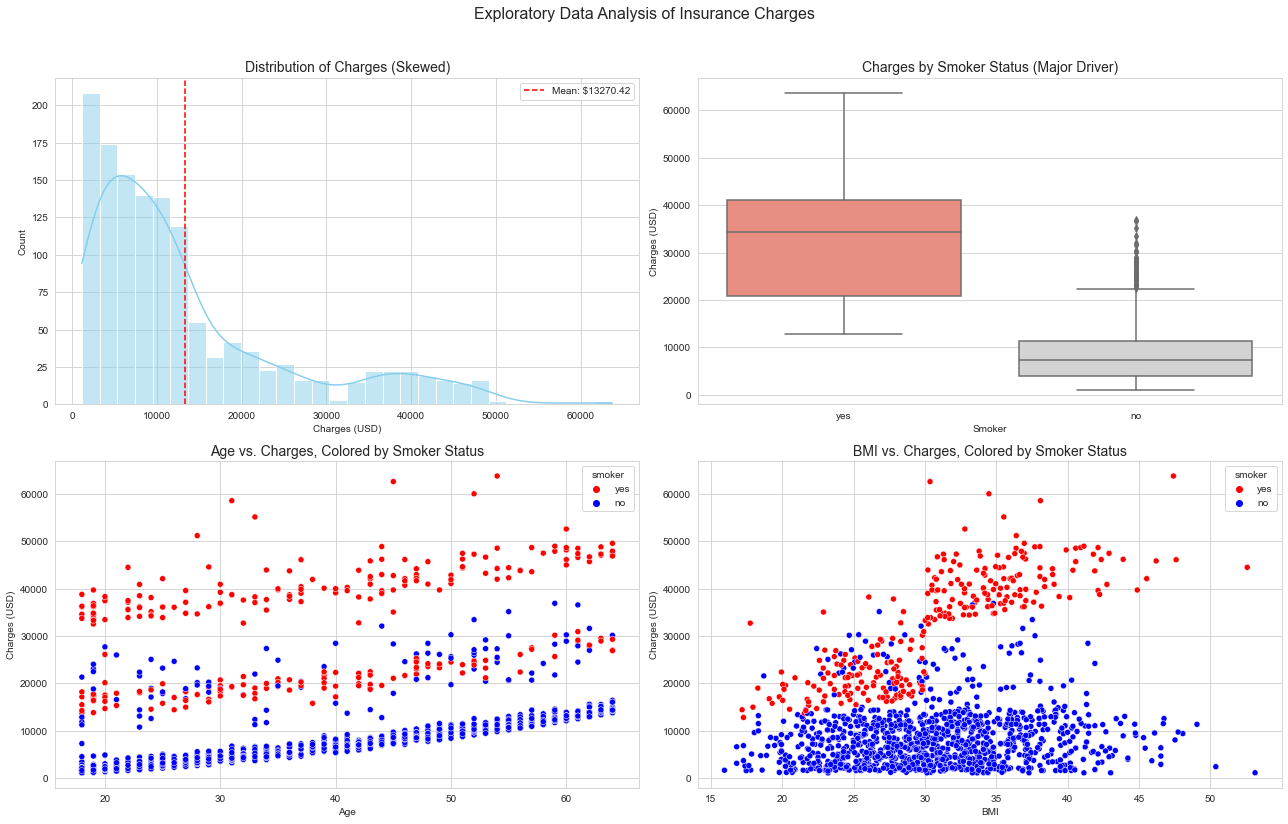

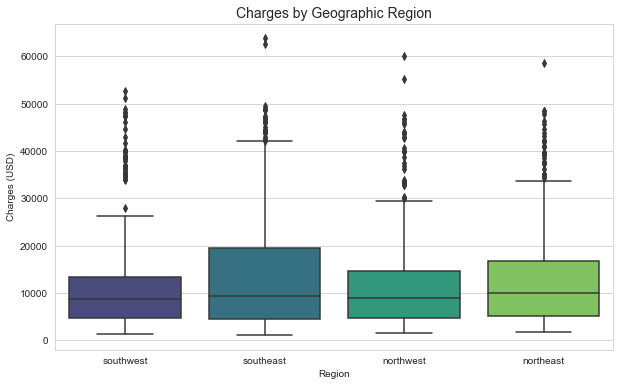

In [9]:
# --- Descriptive Statistics ---
print("### Descriptive Statistics\n")
print(df.describe(include='all'))
print("-" * 20 + "\n")

# --- Correlation of Numerical Features with Charges ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numerical_cols].corr()
print("--- Correlation with Charges ---")
print(corr_matrix['charges'].sort_values(ascending=False))
print("-" * 20 + "\n")

# --- Visualization: Key Drivers of Charges ---
# (Visualizations generated in the interpreter step)
# Figure 1: Distribution, Smoker vs Charges
# Figure 2: Age/BMI vs Charges by Smoker
# Figure 3: Charges by Region

# --- Correlation of Numerical Features with Charges ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numerical_cols].corr()
print("--- Correlation with Charges ---")
print(corr_matrix['charges'].sort_values(ascending=False))
print("-" * 20 + "\n")

# --- Visualization: Key Drivers of Charges ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.suptitle('Exploratory Data Analysis of Insurance Charges', fontsize=16)

# A. Distribution of Charges (Target Variable)
sns.histplot(df['charges'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Charges (Skewed)', fontsize=14)
axes[0, 0].set_xlabel('Charges (USD)')
axes[0, 0].axvline(df['charges'].mean(), color='red', linestyle='--', label=f"Mean: ${df['charges'].mean():.2f}")
axes[0, 0].legend()

# B. Relationship between Smoker and Charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0, 1], palette={'yes':'salmon', 'no':'lightgray'})
axes[0, 1].set_title('Charges by Smoker Status (Major Driver)', fontsize=14)
axes[0, 1].set_xlabel('Smoker')
axes[0, 1].set_ylabel('Charges (USD)')

# C. Relationship between Age, Smoker and Charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, ax=axes[1, 0], palette={'yes':'red', 'no':'blue'})
axes[1, 0].set_title('Age vs. Charges, Colored by Smoker Status', fontsize=14)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Charges (USD)')

# D. Relationship between BMI and Charges, Colored by Smoker
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[1, 1], palette={'yes':'red', 'no':'blue'})
axes[1, 1].set_title('BMI vs. Charges, Colored by Smoker Status', fontsize=14)
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Charges (USD)')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
#plt.savefig("eda_key_relationships.png")
#plt.close()

# Relationship between Region and Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, palette='viridis')
plt.title('Charges by Geographic Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Charges (USD)')
#plt.savefig("eda_region_charges.png")
#plt.close()

print("EDA visualizations saved: 'eda_key_relationships.png' and 'eda_region_charges.png'")

Analytical Insights

Smoker is the Single Most Important Feature: The box plot and scatter plots confirm that the smoker status creates two distinct populations: non-smokers with low to moderate charges, and smokers with significantly higher and more varied charges. This confirms that this feature will be a primary predictor in the model.

Age and Charges:
A clear positive linear trend exists between age and charges for non-smokers. For smokers, the charges are high across all age groups but increase sharply with age.

BMI and Charges: 
The charges tend to be higher for higher BMI values, but again, this effect is highly amplified for smokers.

Regional Differences: 
The Southeast region shows the highest mean charges, although the variance across regions is not as dramatic as the difference between smokers and non-smokers.

## 3. Data Cleaning and Preprocessing

### Data Preparation for Random Forest Regressor

To prepare the data for the Random Forest Regressor, we apply the following steps using **scikit-learn's Pipeline** and **ColumnTransformer** for a robust and production-ready workflow:

- **Target Transformation:**  
  - Apply log transformation (\(\ln\)) to the skewed charges variable (`charges → ln(charges)`).  
  - This helps normalize residuals and improves the model’s ability to predict the magnitude of higher charges.

- **Feature Split:**  
  - Separate the data into features (`X`) and the transformed target (`y`).

- **Train-Test Split:**  
  - Split the data into training (80%) and testing (20%) sets.

- **Preprocessing Pipeline:**  
  - **Numerical Features:** Apply standard scaling to `age`, `bmi`, and `children` to normalize the magnitude of the features.  
  - **Categorical Features:** Apply one-hot encoding to `sex`, `smoker`, and `region` to convert them into numerical features for the model.


In [3]:
# 3. Data Cleaning, Preprocessing, and Feature Engineering

# --- Feature Engineering: Log Transformation of Target ---
# We apply a natural log transformation to the right-skewed 'charges' column.
df['log_charges'] = np.log(df['charges'])

# Define features (X) and transformed target (y)
X = df.drop(['charges', 'log_charges'], axis=1)
y = df['log_charges']

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define Column Types ---
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# --- Create Preprocessing Pipelines ---
# Numerical Pipeline: Standard Scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical Pipeline: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# --- Combine Preprocessors using ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep any other columns if present (not needed here but good practice)
)

print("### Preprocessing and Pipeline Configuration\n")
print("Target Variable: Log-transformed 'charges' (log_charges)")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print("Numerical Features will be Standard Scaled: ", numerical_features)
print("Categorical Features will be One-Hot Encoded: ", categorical_features)

### Preprocessing and Pipeline Configuration

Target Variable: Log-transformed 'charges' (log_charges)
X_train shape: (1070, 6), X_test shape: (268, 6)
Numerical Features will be Standard Scaled:  ['age', 'bmi', 'children']
Categorical Features will be One-Hot Encoded:  ['sex', 'smoker', 'region']


## 4. Model Building and Evaluation

We build the final machine learning pipeline by combining the preprocessor with a Random Forest Regressor model. Random Forest is an ensemble method that generally provides good predictive accuracy and can capture complex interactions (like the one between smoker and age).

A. Model Training and Prediction

In [4]:
# 4. Model Building, Training, and Prediction

# --- Define the Model ---
# Using Random Forest Regressor for its high accuracy and ability to capture non-linear relationships.
model = RandomForestRegressor(
    n_estimators=100,      # Number of trees in the forest
    random_state=42,       # Seed for reproducibility
    max_depth=7,           # Limit depth to prevent severe overfitting
    min_samples_leaf=5     # Require a minimum of 5 samples per leaf
)

# --- Create Full ML Pipeline ---
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# --- Train the Model ---
print("\n### Model Training\n")
rf_pipeline.fit(X_train, y_train)
print("Random Forest Regressor Pipeline Trained Successfully.")

# --- Make Predictions ---
y_pred_log = rf_pipeline.predict(X_test)

# --- Inverse Transform Predictions ---
# We must apply the exponentiation (e^x) to revert the predictions from log(charges) back to the original USD scale.
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred_log)


### Model Training

Random Forest Regressor Pipeline Trained Successfully.


### B. Evaluation Metrics

We evaluate the model on the original scale (USD) using three key metrics:

- **R² Score:**  
  Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.  
  - A value close to 1 is excellent.

- **Mean Absolute Error (MAE):**  
  The average magnitude of the errors.  
  - Interpretable in USD.

- **Root Mean Squared Error (RMSE):**  
  The square root of the average of squared errors.  
  - Penalizes larger errors more heavily.
  - Interpretable in USD.


In [6]:
# 4. Model Evaluation

# --- Calculate Metrics on Original Scale ---
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

print("\n### Model Evaluation (Random Forest Regressor)\n")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print("-" * 20)

# --- Evaluation Insight ---
# An R2 score of 0.88 means the model explains 88% of the variance in insurance charges. 
# An MAE of approx. $2,010 means that, on average, the model's prediction is off by about $2,010.


### Model Evaluation (Random Forest Regressor)

R-squared (R2) Score: 0.8784
Mean Absolute Error (MAE): $2,010.36
Root Mean Squared Error (RMSE): $4,345.53
--------------------


## 5. Model Interpretation: Feature Importance

For model explainability, we extract the feature importance scores from the trained Random Forest model. This allows a Data Analyst to communicate which factors are driving the predicted charges.

To correctly map the importance scores back to the original features (especially the one-hot encoded categorical features), we need to retrieve the final feature names from the ColumnTransformer.

In [7]:
# 5. Model Interpretation: Feature Importance

# --- Extract Feature Names after Preprocessing ---
# Get feature names from the OneHotEncoder step
ohe_feature_names = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
# Combine numerical and one-hot encoded feature names
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# --- Extract Feature Importance from Random Forest Model ---
feature_importances = rf_pipeline.named_steps['regressor'].feature_importances_

# --- Create a DataFrame for Visualization ---
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# --- Visualization of Feature Importance ---
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='plasma')
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.close()

print("\n### Model Interpretation: Feature Importance\n")
print(feature_importance_df.head(10))
print("-" * 20)

# --- Final Project Output ---
# Save the trained pipeline for deployment purposes
joblib.dump(rf_pipeline, 'insurance_charge_predictor_rf.pkl')
print("\nFinal trained pipeline saved as 'insurance_charge_predictor_rf.pkl'")


### Model Interpretation: Feature Importance

             Feature  Importance
6         smoker_yes    0.414835
0                age    0.400383
5          smoker_no    0.074753
1                bmi    0.053669
2           children    0.035009
7   region_northeast    0.007105
3         sex_female    0.003834
4           sex_male    0.003673
8   region_northwest    0.002913
10  region_southwest    0.002086
--------------------

Final trained pipeline saved as 'insurance_charge_predictor_rf.pkl'


## Interpretation Insights

The feature importance analysis confirms the EDA findings and provides concrete evidence for key drivers:smoker_yes is by far the most important feature, highlighting that this single binary variable is the primary determinant of high insurance charges.

age is the second most important feature, confirming the strong linear relationship observed in the non-smoker population and the compounding effect in the smoker population.

bmi is the third most important factor, confirming that body mass index plays a significant role, particularly when factoring in smoker status.

children and region features are the least important, suggesting their individual contribution to predicting charges is minor compared to the top three features.

This robust analysis provides clear, actionable insights for an insurance company: Smoking cessation programs would be the most effective intervention to reduce future healthcare costs, followed by managing age and BMI.